In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


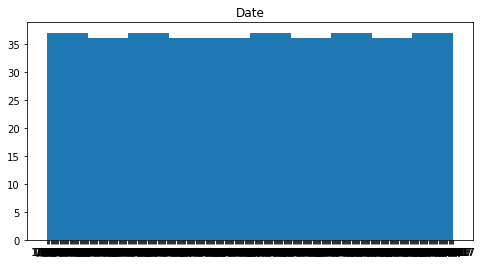

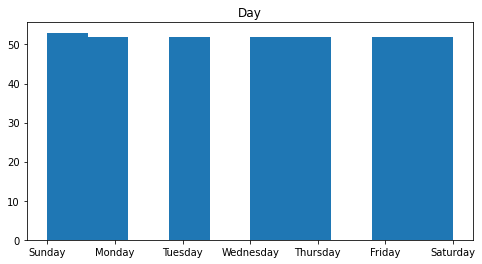

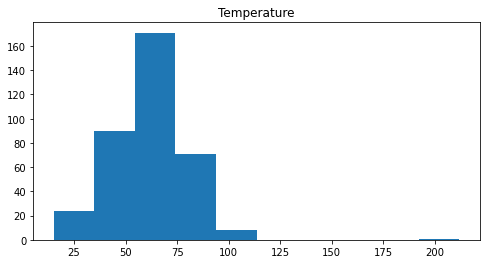

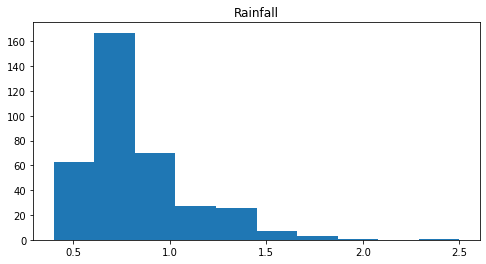

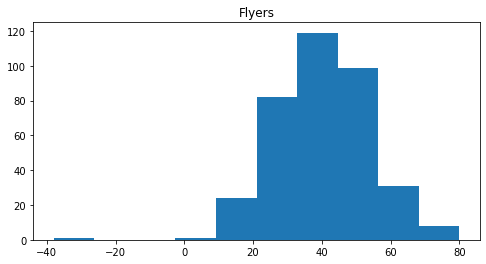

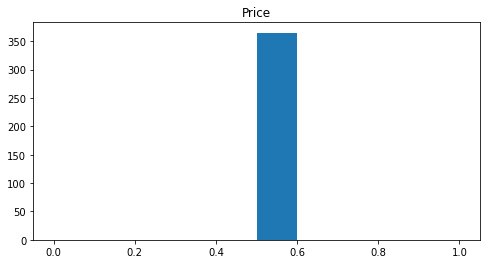

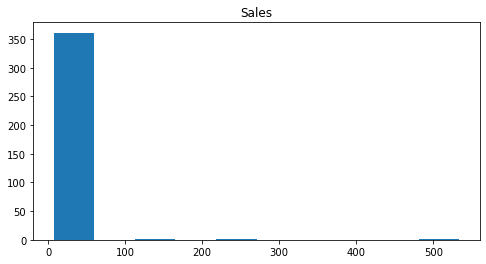

In [5]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [6]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    Q1 = np.percentile(series , 25)
    Q3 = np.percentile(series , 75)
    IQR = Q3 - Q1
    lower = Q1-(IQR * multiplier)
    upper = Q3+(IQR * multiplier)
    return lower, upper

### Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

**Lower bounds**

In [7]:
df[df.Temperature < get_lower_and_upper_bounds(df.Temperature)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


<AxesSubplot:>

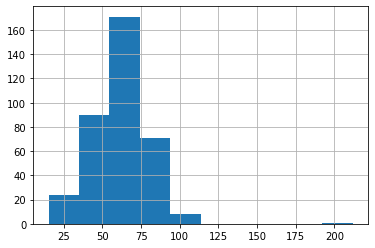

In [8]:
df.Temperature.hist()

**We should keep this outlier as the temperature makes sense.**

In [9]:
df[df.Rainfall < get_lower_and_upper_bounds(df.Rainfall)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**There is no lower outlier for Rainfall.**

In [10]:
df[df.Flyers< get_lower_and_upper_bounds(df.Flyers)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


<AxesSubplot:>

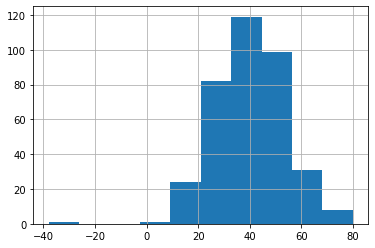

In [11]:
df.Flyers.hist()

**This doesn't make sense as you can't have negative flyers, it is probably an imput error, I would chnage to 38 or remove.**

In [12]:
df[df.Price< get_lower_and_upper_bounds(df.Price)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [13]:
df[df.Sales< get_lower_and_upper_bounds(df.Sales)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**There are no lower outliers for Price or Sales.**

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

**Upper Bounds**

In [14]:
df[df.Temperature > get_lower_and_upper_bounds(df.Temperature)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


**This outlier doesn't make sense and should be removed from the data or checked for a typo.(could be 12 or 21?)**

In [15]:
df[df.Rainfall > get_lower_and_upper_bounds(df.Rainfall)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


**While these values are outliers of the determined range of .4 TO 2.5, they are 'normal' amounts of rainfall and should be kept.**

In [16]:
df[df.Flyers > get_lower_and_upper_bounds(df.Flyers)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


**Even though these are outliers, I believe they hold information on a peak amount of flyers and should be kept for analysis.**

In [17]:
df[df.Price > get_lower_and_upper_bounds(df.Price)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


**There are no upper outliers in Price.**

In [18]:
df[df.Sales > get_lower_and_upper_bounds(df.Sales)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


**It's hard to determine if some, or all, of these outliers hold value with limited data on the information. However, if this is sales data for fireworks, it could hold valuable information showing a sharp spike in sales around the fourth of July which would make sense.**

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [19]:
df[df.Temperature < get_lower_and_upper_bounds(df.Temperature,multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [20]:
df[df.Rainfall< get_lower_and_upper_bounds(df.Rainfall,multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [21]:
df[df.Flyers < get_lower_and_upper_bounds(df.Flyers,multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


**Same explanation as before. Remove, or correct this entry.**

In [22]:
df[df.Price < get_lower_and_upper_bounds(df.Price,multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [23]:
df[df.Sales< get_lower_and_upper_bounds(df.Sales,multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [24]:
df[df.Temperature > get_lower_and_upper_bounds(df.Temperature,multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


**Same explanation as before. Remove, or correct this entry.**

In [25]:
df[df.Rainfall > get_lower_and_upper_bounds(df.Rainfall,multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


**Same explanation as before. Keep this data.**

In [26]:
df[df.Flyers > get_lower_and_upper_bounds(df.Flyers,multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [27]:
df[df.Price > get_lower_and_upper_bounds(df.Price,multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [28]:
df[df.Sales > get_lower_and_upper_bounds(df.Sales,multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


**Again, dive deeper into this data, but firework sales makes sense.**

### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?


<AxesSubplot:>

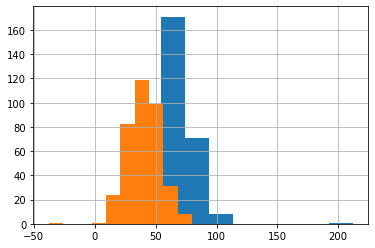

In [29]:
df.Temperature.hist(),
df.Flyers.hist()

Temperature and Flyers are normally distirbuted.

In [32]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[(zscores > 2)| (zscores < -2)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


All tempartures make sense except for the one entry of 212 degrees.

In [33]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[(zscores > 2)| (zscores < -2)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


The only entry that doesn't make sense is -38 flyers.

### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [35]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[(zscores > 3)| (zscores < -3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [34]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[(zscores > 3)| (zscores < -3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Using the 3 sigma decision rule identifies the outliers that should be removed.